# ANÁLISIS Y VISUALIZACIONES

In [2]:
#Importamos librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importamos los DF limpios
films = pd.read_csv('../Data/clean_films.csv', index_col=0)
series = pd.read_csv('../Data/clean_series.csv', index_col=0)

In [4]:
films.head(5)

,film_id,title,original_language,genre_ids,release_date,popularity,vote_average,vote_count,id,genre,release_year,release_month
0,565770,Blue Beetle,en,28,2023-08-16,2973,7.2,956,28,Action,2023,August
1,762430,Retribution,en,28,2023-08-23,1485,6.9,236,28,Action,2023,August
2,615656,Meg 2: The Trench,en,28,2023-08-02,1323,7.0,1973,28,Action,2023,August
3,385687,Fast X,en,28,2023-05-17,1183,7.3,3867,28,Action,2023,May
4,980489,Gran Turismo,en,28,2023-08-09,977,7.8,473,28,Action,2023,August


In [6]:
series.head(5)

,serie_id,name,origin_country,popularity,vote_average,vote_count,num_episodes,episode_duration,first_air_date,genre,release_year,release_month
0,94722,Tagesschau,DE,3359,7.5,147,20839,15.0,1952-12-26,News,1952,December
1,101463,Al rojo vivo,ES,2465,3.0,15,298,200.0,2011-01-10,News,2011,January
2,2224,The Daily Show,US,1694,6.3,452,3830,26.0,1996-07-22,News,1996,July
3,1655,PBS NewsHour,US,569,5.4,42,2591,57.0,1975-10-20,News,1975,October
4,154300,Euronews Hoy,ES,566,4.8,10,647,30.0,2019-01-28,News,2019,January


## `Películas`

- #### Películas a lo largo de los años

In [7]:
#En primer lugar, vamos a centrar el estudio del análisis hasta el año 2023, no vamos a contar con las películas que se estrenen posteriormente

films = films[films['release_year'] <= 2023]

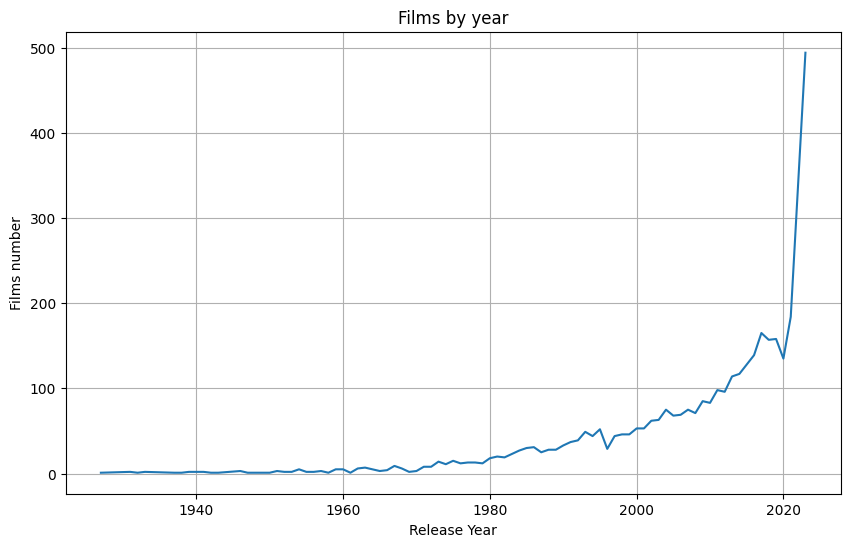

In [9]:
# Agrupamos el df por año de lanzamiento y ccontamos las películas por año
films_by_year = films.groupby('release_year')['film_id'].count()

# Creamos un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(films_by_year.index, films_by_year.values, linestyle='-')

# Etiquetas y título del gráfico
plt.xlabel('Release Year')
plt.ylabel('Films number')
plt.title('Films by year')

# Mostrar el gráfico
plt.grid(True)
plt.show()

- #### Principales idiomas originales

In [10]:
principal_languages = films.groupby('original_language')['film_id'].count().sort_values(ascending=False)[:7]
principal_languages

original_language
en    3116
ja     220
ko     137
es      88
fr      78
it      62
zh      56
Name: film_id, dtype: int64

In [11]:
# Diccionario de mapeo de idiomas
mapeo = {'en': 'English', 'ja': 'Japanese', 'ko': 'Korean', 'es': 'Spanish', 
         'fr': 'French', 'it': 'Italian', 'zh': 'Chinese'}

principal_languages.index = principal_languages.index.map(mapeo)

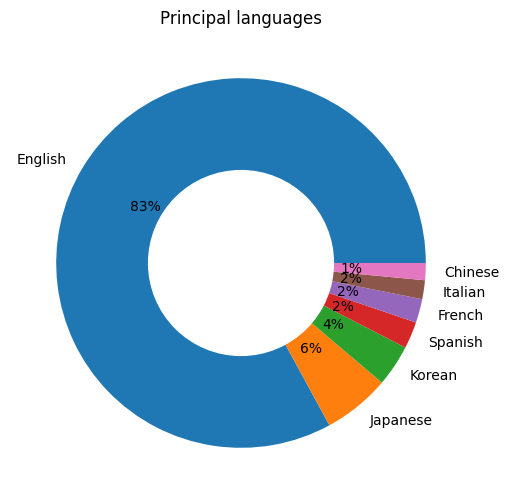

In [12]:
labels = principal_languages.index
data = principal_languages.values

# Creaamos el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels,  autopct='%.0f%%')

# Añadimos un círculo
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Título del gráfico
plt.title('Principal languages')

plt.show()

- #### Película más popular y películas con mejor valoración

In [13]:
films_sorted_by_popularity = films.sort_values(by='popularity', ascending=False)
films_sorted_by_popularity.head(1)

,film_id,title,original_language,genre_ids,release_date,popularity,vote_average,vote_count,id,genre,release_year,release_month
0,565770,Blue Beetle,en,28,2023-08-16,2973,7.2,956,28,Action,2023,August


In [14]:
films[films['vote_average'] == 10]

,film_id,title,original_language,genre_ids,release_date,popularity,vote_average,vote_count,id,genre,release_year,release_month
2769,1175107,My Otaku Girlfriend,es,18,2023-09-28,64,10.0,1,18,Drama,2023,September
2807,1032194,The Blind,en,18,2023-09-28,48,10.0,3,18,Drama,2023,September
2851,1105832,Simón,en,18,2023-04-15,40,10.0,1,18,Drama,2023,April
2890,731159,Female Boss Hooker,ko,18,2020-08-31,49,10.0,1,18,Drama,2020,August
3053,1118256,Keramat Tunggak,id,18,2023-04-21,24,10.0,1,18,Drama,2023,April
3187,1135727,Sugapa,tl,18,2023-08-25,26,10.0,1,18,Drama,2023,August
3900,1173464,Fanny Ardant - Naissance d'une passion,fr,99,2023-09-27,20,10.0,1,99,Documentary,2023,September


- #### ¿Una mayor popularidad implica una mejor valoración? 

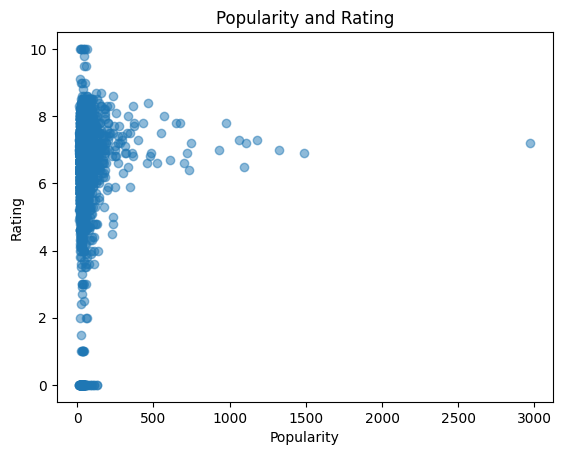

In [15]:
# Crear el gráfico de dispersión
plt.scatter(films['popularity'], films['vote_average'], alpha=0.5)  # alpha ajusta la transparencia de los puntos

# Etiquetas de los ejes y título
plt.xlabel('Popularity')
plt.ylabel('Rating')
plt.title('Popularity and Rating')

# Mostrar el gráfico
plt.show()

Aparentemente no existe una relación directa entre popularidad y valoración de los usuarios

- #### Valoraciones y popularidad de las películas en función de sus géneros

In [30]:
films_by_genre = films.groupby(by= 'genre')[['vote_average', 'popularity']].mean()

In [31]:
films_by_genre

,vote_average,popularity
genre,,
Action,6.535165,62.528846
Adventure,6.728777,45.294964
Animation,7.108403,54.459384
Comedy,6.283299,38.729897
Crime,6.791241,41.547445
Documentary,6.296875,36.968750
Drama,6.492910,36.794682
Family,6.635593,45.466102
Fantasy,6.657143,41.892857


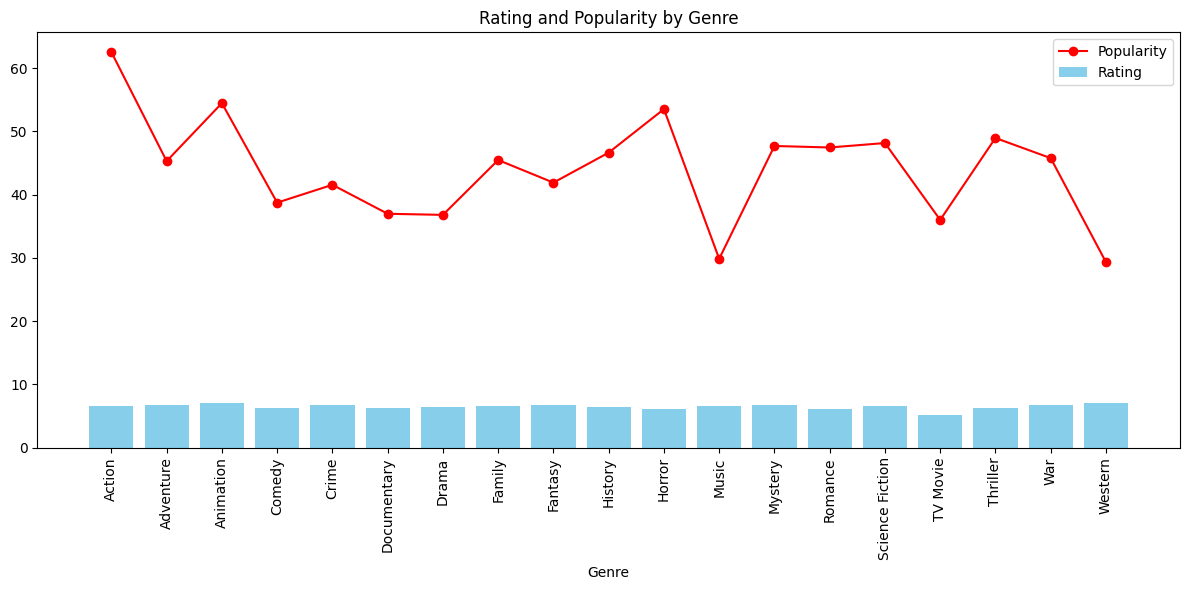

In [40]:
# Crear un gráfico de barras para la popularidad por género
plt.figure(figsize=(12, 6))
plt.bar(films_by_genre.index, films_by_genre['vote_average'], label='Rating', color='skyblue')

# Crear un gráfico de líneas para la calificación promedio por género
plt.plot(films_by_genre.index, films_by_genre['popularity'], marker='o', linestyle='-', color='red', label='Popularity')

# Etiquetas de los ejes y título
plt.xlabel('Genre')
plt.title('Rating and Popularity by Genre')

# Mostrar el gráfico con leyenda
plt.legend()
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Se aprecia que en la valoración promedia de los usuarios el género de la película no tiene ninguna influencia, mientras que en el caso de la popularidad, se ven diferencias en función del género, tendiendo a ser las películas más populares las de acción, animación y horror, y las menos populares las de televisión, las del oeste y las musicales.

- #### Popularidad de las películas en función de los meses en los que sale la película

In [38]:
films_by_month = films.groupby(by= 'release_month')[['popularity']].mean()

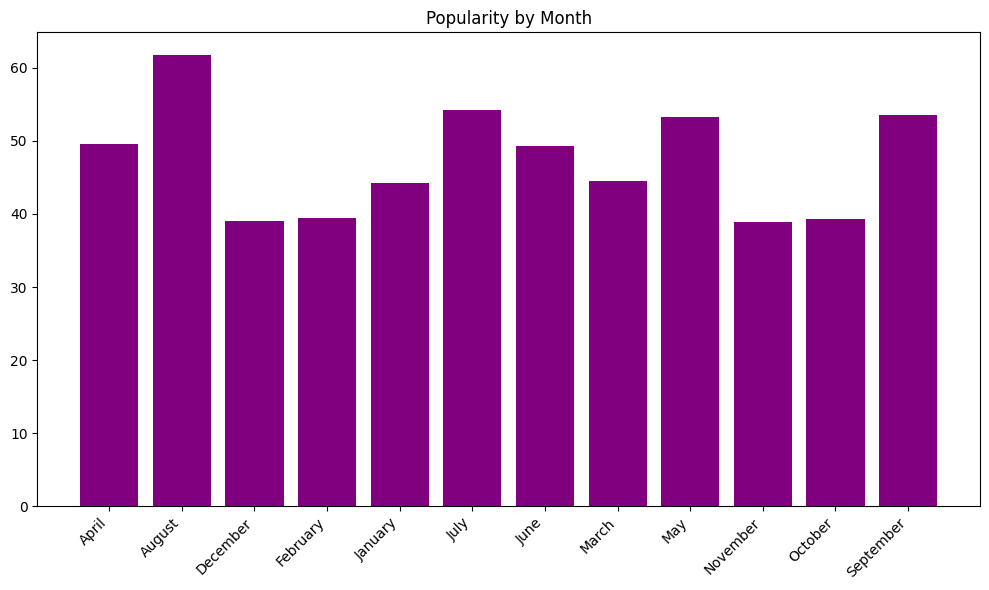

In [49]:


plt.figure(figsize=(10, 6))
plt.bar(films_by_month.index, films_by_month['popularity'], label='Popularity', color='purple')
plt.xticks(films_by_month.index, rotation=45, ha='right')  # Establecer el orden de los meses en el eje X
plt.title('Popularity by Month')

# Mostrar el gráfico
plt.tight_layout()
plt.show()




## `Series`

- #### Series a lo largo de los años

- #### Principales países de origen

- #### Relación entre popularidad y valoración en series

- #### Popularidad y valoración por género de serie

- #### ¿Influye la duración en el exito?